<a href="https://colab.research.google.com/github/qunyizhao/ECON211_Decision_Tree/blob/main/DecisionTree_AQI_Qunyi_Zhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Wrangling

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [ ]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/qunyizhao/ECON211_Decision_Tree/main/ChinaAQI.csv')
df.head()

,City,AQI,GDP
0,Ngawa Prefecture,23,271.13
1,Aksu City,137,610.00
2,Alxa League,85,322.58
3,Ngari,28,37.40
4,Anqin City,79,1613.20


In [ ]:
df['GDP_Class']=pd.qcut(df["GDP"],3,labels=np.arange(1,4,1) )
df.head()

,City,AQI,GDP,GDP_Class
0,Ngawa Prefecture,23,271.13,1
1,Aksu City,137,610.00,1
2,Alxa League,85,322.58,1
3,Ngari,28,37.40,1
4,Anqin City,79,1613.20,2


In [ ]:
df['Rank']=df['GDP_Class'].apply(lambda x: 'High' if x==3 else 'Average' if x==2 else 'Low')
df.head()

,City,AQI,GDP,GDP_Class,Rank
0,Ngawa Prefecture,23,271.13,1,Low
1,Aksu City,137,610.00,1,Low
2,Alxa League,85,322.58,1,Low
3,Ngari,28,37.40,1,Low
4,Anqin City,79,1613.20,2,Average


# Build Decision Tree

In [ ]:
feature_names=['AQI']
features=df[feature_names]
targets=df['Rank']
targets_names = targets.unique()

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.51


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


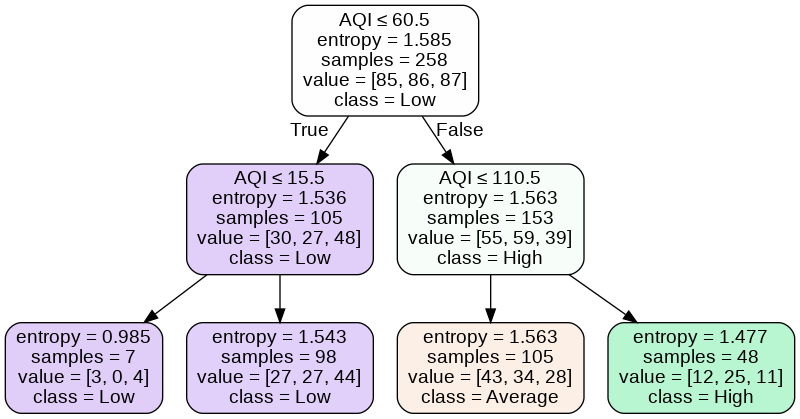

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AQI.png')
Image(graph.create_png())